# Final Project 

## Phase 1

### Imports and Load csv

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

breastcancerdf = pd.read_csv("C:\Breast-Cancer-Wisconsin.csv")

## Replace missing values

In [2]:
breastcancerdf.A7=breastcancerdf.A7.replace('?', np.NaN)

### Convert column A7 to numeric

In [3]:
s = pd.Series(breastcancerdf.A7)
breastcancerdf.A7 = pd.to_numeric(s)
print('Total NaN = ', s.isnull().sum())

Total NaN =  16


### Fill null values with column mean

In [4]:
breastcancerdf=breastcancerdf.fillna(breastcancerdf.mean(skipna=True))
print(breastcancerdf)

         Scn  A2  A3  A4  A5  A6         A7  A8  A9  A10  CLASS
0    1000025   5   1   1   1   2   1.000000   3   1    1      2
1    1002945   5   4   4   5   7  10.000000   3   2    1      2
2    1015425   3   1   1   1   2   2.000000   3   1    1      2
3    1016277   6   8   8   1   3   4.000000   3   7    1      2
4    1017023   4   1   1   3   2   1.000000   3   1    1      2
5    1017122   8  10  10   8   7  10.000000   9   7    1      4
6    1018099   1   1   1   1   2  10.000000   3   1    1      2
7    1018561   2   1   2   1   2   1.000000   3   1    1      2
8    1033078   2   1   1   1   2   1.000000   1   1    5      2
9    1033078   4   2   1   1   2   1.000000   2   1    1      2
10   1035283   1   1   1   1   1   1.000000   3   1    1      2
11   1036172   2   1   1   1   2   1.000000   2   1    1      2
12   1041801   5   3   3   3   2   3.000000   4   4    1      4
13   1043999   1   1   1   1   2   3.000000   3   1    1      2
14   1044572   8   7   5  10   7   9.000

## Compute Stats

In [5]:
breastcancerdf.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Report the number of rows, columns and unique values

In [6]:
print('Total rows = ', breastcancerdf.shape[0])
print('Total columns = ', breastcancerdf.shape[1])
print('Unique ID values = ',len(breastcancerdf.Scn.unique()))

Total rows =  699
Total columns =  11
Unique ID values =  645


## Plot Basic Graphs

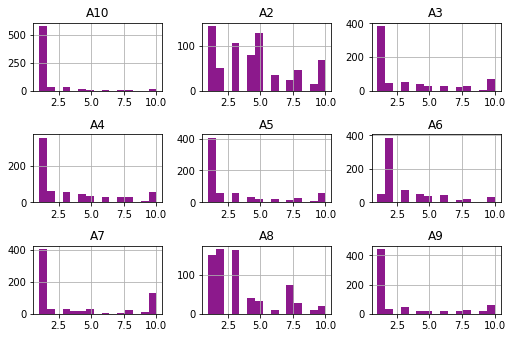

In [7]:
df_A=breastcancerdf.loc[:,"A2":"A10"]
df_A.hist(bins=15, color="purple", alpha=0.9)
plt.tight_layout(rect=(0,0,1.2,1.2))

## Bar Plot for CLASS

Text(0,0.5,'Count')

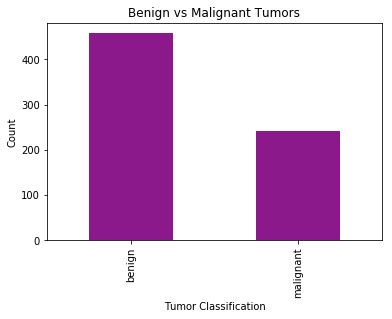

In [8]:
df_B=breastcancerdf.CLASS.value_counts()
sp=df_B.plot.bar(color = 'purple', alpha = 0.9)
sp.set_xticklabels(['benign', 'malignant'])
sp.set_title('Benign vs Malignant Tumors')

sp.set_xlabel('Tumor Classification')
sp.set_ylabel('Count')

## Scatterplot of any 2 columns

Text(0,0.5,'Cell Size')

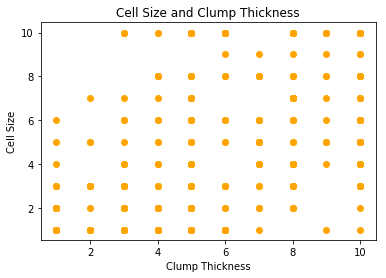

In [9]:
x=breastcancerdf.A2
y=breastcancerdf.A3
plt.scatter(x,y,color = 'orange')
plt.title("Cell Size and Clump Thickness")
plt.xlabel("Clump Thickness")
plt.ylabel("Cell Size")

# Phase 2

In [10]:
## Import KMeans

from sklearn.cluster import KMeans



## Use only columns A2 - A10

In [11]:
df_A=breastcancerdf.loc[:,"A2":"A10"]
print(df_A)

     A2  A3  A4  A5  A6         A7  A8  A9  A10
0     5   1   1   1   2   1.000000   3   1    1
1     5   4   4   5   7  10.000000   3   2    1
2     3   1   1   1   2   2.000000   3   1    1
3     6   8   8   1   3   4.000000   3   7    1
4     4   1   1   3   2   1.000000   3   1    1
5     8  10  10   8   7  10.000000   9   7    1
6     1   1   1   1   2  10.000000   3   1    1
7     2   1   2   1   2   1.000000   3   1    1
8     2   1   1   1   2   1.000000   1   1    5
9     4   2   1   1   2   1.000000   2   1    1
10    1   1   1   1   1   1.000000   3   1    1
11    2   1   1   1   2   1.000000   2   1    1
12    5   3   3   3   2   3.000000   4   4    1
13    1   1   1   1   2   3.000000   3   1    1
14    8   7   5  10   7   9.000000   5   5    4
15    7   4   6   4   6   1.000000   4   3    1
16    4   1   1   1   2   1.000000   2   1    1
17    4   1   1   1   2   1.000000   3   1    1
18   10   7   7   6   4  10.000000   4   1    2
19    6   1   1   1   2   1.000000   3  

### Create KMeans model for n_cluster = 4

In [29]:
test = df_A.values
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4)
model.fit(test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
labels = model.predict(test)
print(labels)

[0 2 0 3 0 1 0 0 0 0 0 0 0 0 1 3 0 0 2 0 2 3 0 3 0 2 0 0 0 0 0 0 3 0 0 0 3
 0 2 2 3 3 1 3 3 0 2 0 0 3 3 0 3 1 2 3 3 3 2 3 3 0 3 3 0 3 0 2 1 0 0 3 0 2
 3 0 0 0 0 0 0 0 0 0 1 3 2 1 0 0 0 0 0 0 0 0 0 0 3 1 3 0 0 0 1 0 2 1 0 2 0
 2 2 1 0 0 0 1 0 0 0 0 1 2 1 0 2 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 1 0 2 3 0 0 2 0 0 0 1 2 0 0 0 0 0 1 3 0 0 0 0 0 1 2 1 0 3 0 2 0 0 0 1 2
 0 1 1 1 0 1 1 0 0 0 0 2 0 0 0 1 2 0 0 0 1 3 0 0 0 1 1 0 1 1 3 0 0 3 0 0 1
 0 2 2 0 2 3 0 1 2 1 3 2 0 0 1 3 1 2 0 0 0 0 0 0 1 2 0 0 0 2 2 1 3 2 0 0 0
 2 2 1 1 2 3 0 2 2 3 0 2 0 2 0 0 0 0 0 0 2 0 0 2 2 2 1 1 0 3 1 0 0 3 2 0 2
 3 0 0 2 3 0 1 0 2 2 0 0 3 0 0 0 3 0 0 3 2 1 0 2 2 0 0 2 0 0 2 0 3 2 2 0 0
 2 2 0 2 0 0 2 2 0 0 0 1 0 0 0 3 2 0 0 3 1 0 0 0 1 3 2 1 2 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 3 0 2 0 2 0 0 0 0 1 0 0 0 1 0 3 0 0 0 0 0 0 2 2 3 0 0 0 2 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 2 3 0 0 0 0 0 0 0 3 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 3 0 0 2 0 

## Calculate centroids

In [31]:
centroids = model.cluster_centers_
print(centroids)

[[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.23404255 4.85106383 5.04255319 4.86170213 4.11702128 9.38297872
  5.26595745 3.78723404 1.64893617]
 [7.46478873 7.02816901 6.67605634 4.1971831  5.53521127 3.45322005
  5.38028169 6.81690141 2.30985915]]


## Find optimal number of clusters 

In [15]:
ks = range (1, 15)
inertias = []
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(test)
    inertias.append(model.inertia_)
print(inertias)

[49078.827192998986, 19694.977242129746, 16599.3563845307, 15019.505116411576, 14088.254120977199, 13126.342185637503, 12351.64012637213, 11741.611408365203, 11011.778026121396, 10614.100923503534, 10142.068553287038, 9774.035225193187, 9513.458931529738, 9273.544961497091]


## Plot inertia

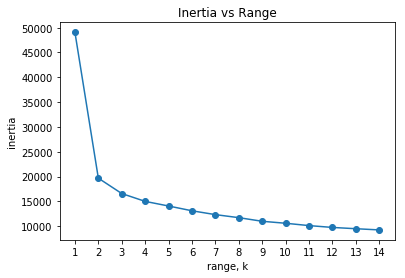

In [16]:
plt.plot(ks,inertias,'-o')
plt.title('Inertia vs Range')
plt.xlabel('range, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Revise data variation

In [17]:
stdev= df_A.std()
print(stdev)

A2     2.815741
A3     3.051459
A4     2.971913
A5     2.855379
A6     2.214300
A7     3.601852
A8     2.438364
A9     3.053634
A10    1.715078
dtype: float64


Text(0,0.5,'Standard Deviation')

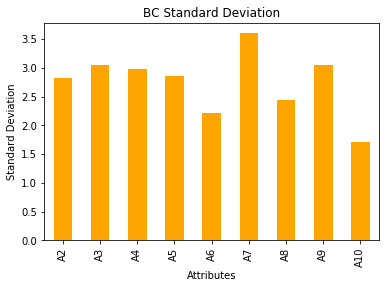

In [18]:
sp=stdev.plot.bar(color = 'orange')
sp.set_title('BC Standard Deviation')
sp.set_xlabel('Attributes')
sp.set_ylabel('Standard Deviation')

## Imports (to implement normalization)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [20]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=2)
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(test)
labels = pipeline.predict(test)
print(labels)

[1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0
 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1
 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 1 1 1 0 0 1 1 0 1 

## Find and print centroids

In [21]:
centroids=kmeans.cluster_centers_
print(centroids)

[[ 0.98276779  1.20070054  1.19107621  1.01916726  1.01393589  1.15647956
   1.08298713  1.04765873  0.59959005]
 [-0.497738   -0.60811342 -0.60323903 -0.51617307 -0.51352357 -0.58571702
  -0.54849564 -0.53060302 -0.30367169]]


# Phase 3

## Cluster

In [22]:
model = KMeans(n_clusters = 2, n_init = 20, max_iter = 500)
model.fit(test)
labels = model.predict(test)

In [23]:
labels = model.predict(test)

## Dataframe

In [24]:
import pandas as pd

## Create a new column

In [29]:
labels = model.predict(test)
new_col = pd.DataFrame(breastcancerdf,columns=['CLASS','labels'])

In [30]:
print(new_col.head(n=15))

    CLASS  labels
0       2     NaN
1       2     NaN
2       2     NaN
3       2     NaN
4       2     NaN
5       4     NaN
6       2     NaN
7       2     NaN
8       2     NaN
9       2     NaN
10      2     NaN
11      2     NaN
12      4     NaN
13      2     NaN
14      4     NaN


In [25]:
CLASS = breastcancerdf.loc[:,'CLASS']
d = {'CLASS':CLASS,'labels':labels}
new_df = pd.DataFrame(d)
new_df.head()

,CLASS,labels
0,2,1
1,2,0
2,2,1
3,2,0
4,2,1


In [27]:
new_df['labels'] = new_df['labels'].replace(0,2)
new_df['labels'] = new_df['labels'].replace(1,4)
new_df.head(15)

,CLASS,labels
0,2,4
1,2,2
2,2,4
3,2,2
4,2,4
5,4,2
6,2,4
7,2,4
8,2,4
9,2,4


## Error Rate Function

In [28]:

def ErrorRate(labels, CLASS):
    #Count the number of 2 and 4 values that are in column CLASS with labels of 2 or 4
    labels_class = new_df['CLASS'].groupby(new_df['labels']).value_counts()
    
    #Create and display a data frame that adds 'counts' column with the value counts
    labels_class_df=pd.DataFrame(labels_class.reset_index(name = "counts"))
    print(labels_class_df)
    
    #Assign values in 'counts' column to variables
    int_0 = labels_class_df.loc[0,'counts']
    int_1 = labels_class_df.loc[1,'counts']
    int_2 = labels_class_df.loc[2,'counts']
    int_3  = labels_class_df.loc[3,'counts']
    
    #Perform and print Error Rate Calculations
    B_Error = int_3/(int_0 + int_1)
    print("Error Rate for Benign:", B_Error)
    M_Error = int_1/(int_2 + int_3)
    print("Error Rate for Malignant:", M_Error)
    Total_Error = (int_1 + int_3)/(labels_class_df.counts.sum())
    print("Total Error Rate:", Total_Error)
    
ErrorRate(labels, CLASS)

   labels  CLASS  counts
0       2      4     222
1       2      2      11
2       4      2     447
3       4      4      19
Error Rate for Benign: 0.0815450643776824
Error Rate for Malignant: 0.023605150214592276
Total Error Rate: 0.04291845493562232


## Report Statement

The final project analyzed 699 samples of 10 different attributes of abnormal growth, which included clump thickness, marginal adhesion, and single epithelial cell size, among others.  In Phase 1 some basic statistics were calculated on the breast cancer dataset.  Looking at the means of each attribute, the distribution was low.  In phase 2, the optimal number of clusters were determined using the KMeans elbow method.  A plot of Inertia vs Range showed inertia decreased rapidly at K= 2, creating an elbow.   Thus, the optimal number of clusters for this dataset is 2.   In the final phase of the project, some error rate calculations were performed.  The error rate for benign growths was lower than for malignant growths and the total error rate was between the two error rates for benign and malignant.  The higher error rate for the malignant growth may be attributed to the smaller sample set for malignant which was 233 samples versus 466 samples for benign.  